In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [42]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [43]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


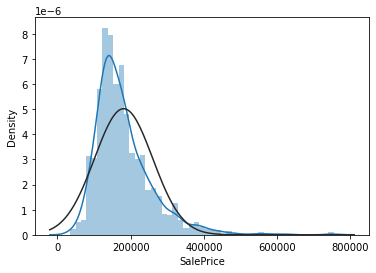

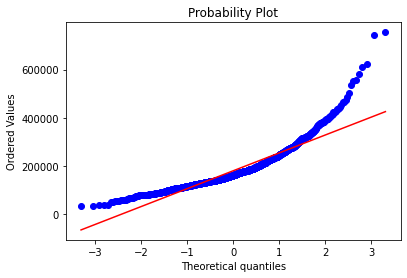

In [44]:
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

- There is a positve Kurtosis (describing that the histogram distribution is peaked)
- SalePrice doesn't follow the normal distrubution of a straight line

In [45]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


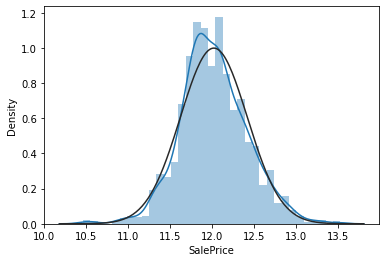

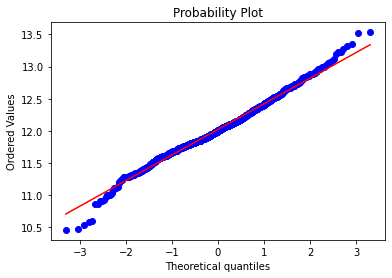

In [46]:
train['SalePrice'] = np.log(train['SalePrice'])
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [47]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 0.121335
Kurtosis: 0.809532


In [48]:
null = train.isnull().sum().sort_values(ascending=False)
null.head(19)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

- Since none of these features with missing values have above a 50% correlation with SalePrice, I think it'd be best to remove them.

In [49]:
train.dropna(how='any', axis = 1, inplace = True)

- Feature engineering with total sqft:

In [50]:
train['totalsqft'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['TotalBsmtSF']

In [51]:
corr = train.corr()
corr_sale_price = corr[['SalePrice']].sort_values(by='SalePrice')
highest_correlated = corr_sale_price.sort_values(ascending=False, by='SalePrice')
print(highest_correlated.head(15))

              SalePrice
SalePrice      1.000000
OverallQual    0.817184
totalsqft      0.777296
GrLivArea      0.700927
GarageCars     0.680625
GarageArea     0.650888
TotalBsmtSF    0.612134
1stFlrSF       0.596981
FullBath       0.594771
YearBuilt      0.586570
YearRemodAdd   0.565608
TotRmsAbvGrd   0.534422
Fireplaces     0.489449
BsmtFinSF1     0.372023
WoodDeckSF     0.334135


- Highest correlation with other variables with respect to SalePrice. 
- We see the top 3 overallQual, GrLivArea(living Area sq ft), Totalsqft have the greatest correlation with SalePrice
- Here, I will consider anything above 80% correlation with SalePrice to be "Strong" and anything below 50% to be "weak" to use as features.
- multicollinearity w/overallQual indicates redundant information

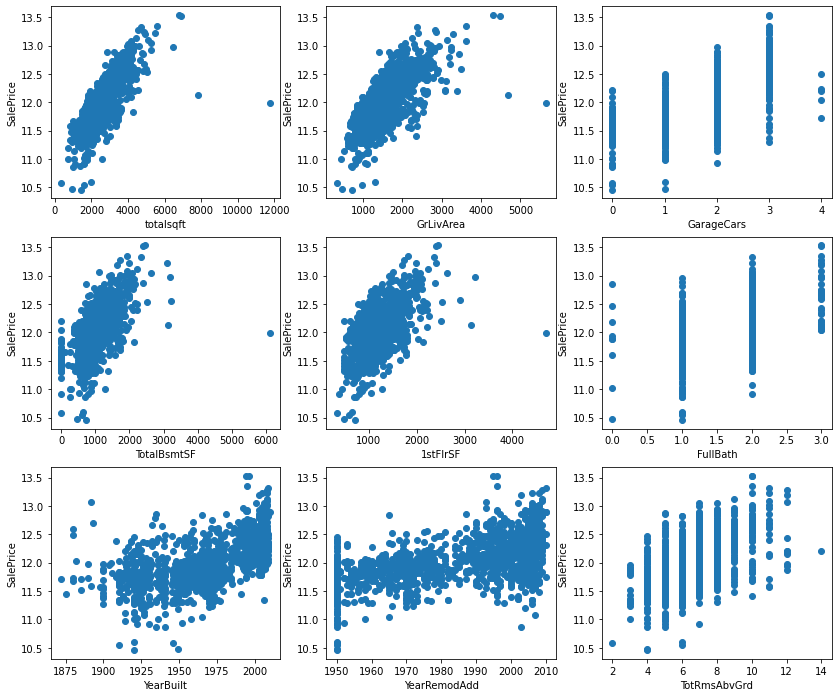

In [52]:
col = ['totalsqft', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd']
fig, axs = plt.subplots(3, 3, figsize = (14, 12))
for i, k in enumerate(col):
    ax = axs[i // 3, i % 3]
    ax.set_xlabel(k) # Sets to specific subplot
    ax.set_ylabel('SalePrice')
    ax.scatter(x = train[k], y = train['SalePrice'])


Looking at the subplots we can see clear outliers in totalsqft, GrLivArea, TotalBsmtSF, and 1stFlrSF

In [53]:
train.drop(train[(train['totalsqft'] > 7500) & (train['SalePrice'] < 12.5)].index, inplace=True)
train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 12.5)].index, inplace=True)
train.drop(train[train['TotalBsmtSF'] > 5000].index, inplace=True)
train.drop(train[train['1stFlrSF'] > 4000].index, inplace=True)

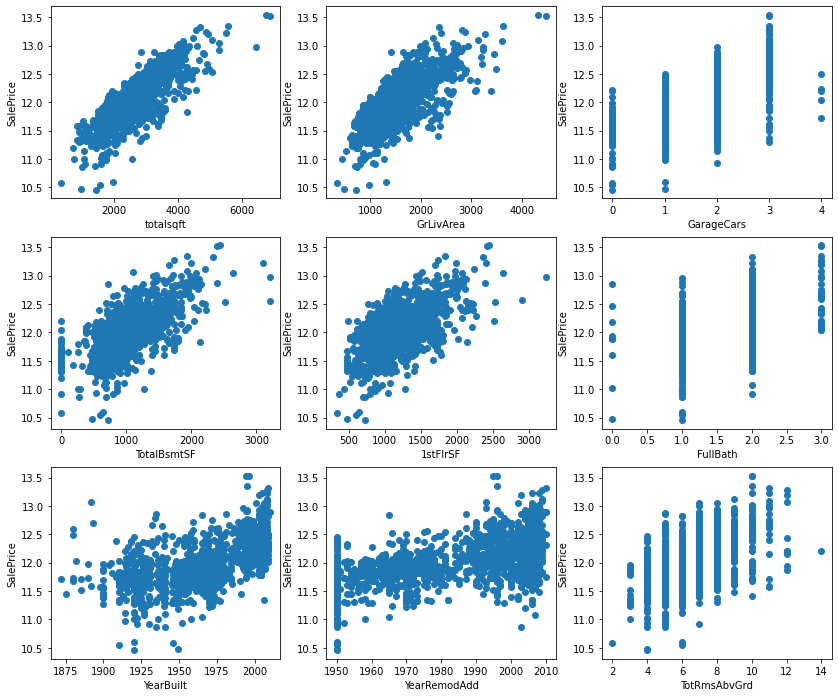

In [54]:
fig, axs = plt.subplots(3, 3, figsize = (14, 12))
for i, k in enumerate(col):
    ax = axs[i // 3, i % 3]
    ax.set_xlabel(k) # Sets to specific subplot
    ax.set_ylabel('SalePrice')
    ax.scatter(x = train[k], y = train['SalePrice'])


In [55]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
categorical_vars = train.select_dtypes(include = 'object').columns
encoder = OneHotEncoder()
for i in categorical_vars:
    encoder.fit(train[[i]])
    one_hot = encoder.transform(train[[i]])
    one_hot = one_hot.toarray()

I will be using one-hot encoding as opposed to labelencoding since, my models might interpret the dummy variables as a ranking. Hot encoding does not imply an order for these models.

In [57]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [58]:
X = train[['totalsqft', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd']]
y = train['SalePrice']

X_test, X_train, y_test, y_train = train_test_split(X,y,test_size=0.2, train_size=0.8)


In [59]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
scores = cross_val_score(model, X, y, cv=10)
print(f'Mean score: {scores.mean():.3f}')
print(f'Standard deviation: {scores.std():.3f}')
model.score(X_test, y_test)

Mean score: 0.819
Standard deviation: 0.017


0.7942006155860022

In [60]:
print(test.shape, train.shape)

(1459, 80) (1458, 63)
